# nmi | 2024 spring
## lecture 10 : QR factorization


### 4.3 QR factorization


#### 4.3.1 gram-schmidt orthogonalization and least squares


gram–schmidt method orthogonalizes a set of vectors. given an input set of $m$-dimensional vectors, the goal is to ﬁnd an orthogonal coordinate system for the subspace spanned by the set. more precisely, given $n$ linearly independent input vectors, it computes $n$ mutually perpendicular unit vectors spanning the same subspace as the input vectors. the unit length is with respect to the euclidean or 2-norm, which is all about this week.
</br></br>

let $A_1,\dots,A_n$ be linearly independent vectors from $\mathbb{R}^m$. ie, $n\le m$. gram–schmidt begins by dividing $A_1$ by its length to make it a unit vector. define
</br></br>

$$y_1 = A_1, \quad q_1 = \frac{y_1}{||y_1||_2}.$$
</br>

to find the second unit vector, subtract away the projection of $A_2$ in the direction of $q_1$ and normalize the result:
</br></br>

$$y_2 = A_2 - q_1(q_1^TA_2), \quad q_2 = \frac{y_2}{||y_2||_2}.$$
</br>

then $q_1^Ty_2 = q_1^T(A_2 - q_1(q_1^TA_2)) = q_1^TA_2 - q_1^TA_2 = 0$, so $q_1$, $q_2$ are pairwise orthogonal.
</br></br>

at $j$th step, define
</br></br>

$$y_j = A_j - q_1(q_1^TA_j) - q_2(q_2^TA_j) - \dots - q_{j-1}(q_{j-1}^TA_j), \quad q_j = \frac{y_j}{||y_j||_2}.$$
</br>

it is clear $q_j$ is orthogonal to each of the previously produced $q_i$ for $i=1,\dots,j-1$, bc
</br></br>

\begin{align}
  q_i^Ty_j &= q_i^TA_j - q_i^Tq_1q_1^TA_j - \dots - q_i^Tq_{j-1}q_{j-1}^TA_j \\
  &= q_i^TA_j - q_i^Tq_iq_i^TA_j = 0,
\end{align}
</br>

where by induction, the $q_i$ are pairwise orthogonal for $i<j$. geometrically, this corresponds to subtracting from $A_j$ the projections of $A_j$ onto the previously determined orthogonal vectors $q_i, i = 1,\dots,j−1$. What remains is orthogonal to $q_i$ and, after dividing by its length to become a unit vector, is used as $q_j$ . therefore, the set $\{q_1,\dots,q_n\}$ consists of mutually orthogonal vectors spanning the same subspace of $\mathbb{R}^m$ as $\{A1,\dots,A_n\}$.
</br>



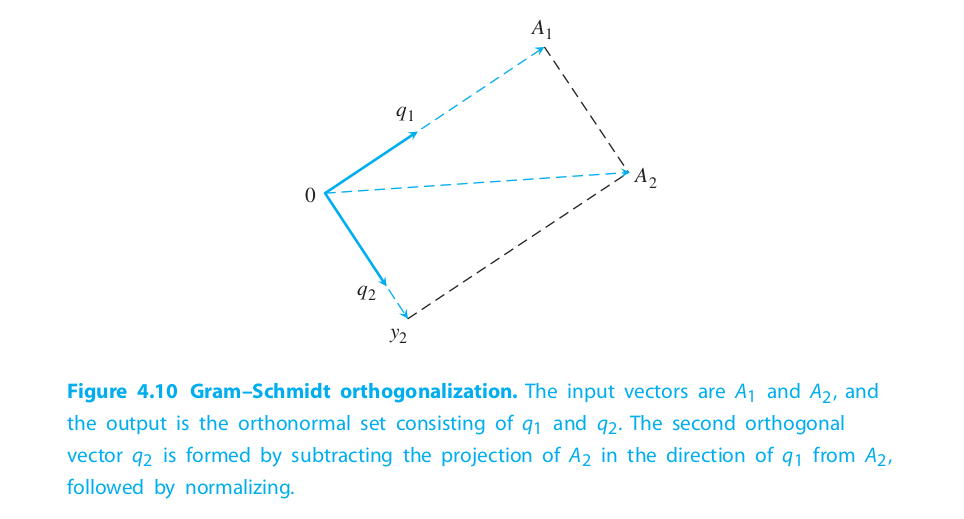

the result of gram-schmidt orthogonalization can be put into matrix form by introducing new notation for the dot products in the above calculation. deﬁne $r){jj} = ||y_j||_2$ and $r_{ij} = q_i^TA_j$. then
</br></br>

\begin{align}
  A_1 &= r_{11}q_1 \\
  A_2 &= r_{12}q_1 + r_{22}q_2 \\
  \\
  &\Downarrow \\
  \\
  A_j &= r_{1j}q_1 + \dots + r_{j-1,j}q_{j-1} + r_{jj}q_j \\
  \\
  &\Downarrow \\
  \\
  (A_1|\dots|A_n) &= (q_1|\dots|q_n)
  \begin{bmatrix}
    r_{11} & r_{12} & \dots & r_{1n} \\
    & r_{22} & \dots & r_{2n} \\
    & & \ddots & \vdots \\
    & & & r_{nn}
  \end{bmatrix} \\
  \\
  &\Downarrow \\
  \\
  A &= QR,
\end{align}
</br>

where $A$ is matrix consisting of columns $A_j$. this is <b>reduced QR factorization</b>. the assumption that vectors $A_j$ are linearly independent guarantees that the main diagonal coefficients $r_{jj}$ are nonzero. conversely, if $A_j$ lies in span of $A_1,\dots,A_{j-1}$, then the projections onto the latter vectors make up the entire vector and $r_{jj} = ||y_j||_2 = 0$.
</br>


##### example 12


find reduced QR factorization by applying gram-schmidt orthogonalization to
</br></br>

$$A = \begin{bmatrix} 1 & -4 \\ 2 & 3 \\ 2 & 2 \end{bmatrix}.$$
</br>


\begin{align}
  y_1 &= A_1 = \begin{bmatrix} 1 \\ 2 \\ 2 \end{bmatrix} \\ \\
  r_{11} &= ||y_1||_2 = \sqrt{1^2 + 2^2 + 2^2} = 3 \\ \\
  q_1 &= \frac{y_1}{||y_1||_2} =
  \begin{bmatrix}
    \frac{1}{3} \\ \frac{2}{3} \\ \frac{2}{3}
  \end{bmatrix} \\
  \\
  y_2 &= A_2 - q_1\underbrace{q_1^TA_2}_{r_{12}} =
  \begin{bmatrix} -4 \\ 3 \\ 2 \end{bmatrix} -
  \begin{bmatrix}
    \frac{1}{3} \\ \frac{2}{3} \\ \frac{2}{3}
  \end{bmatrix} \cdot 2 =
  \begin{bmatrix}
    -\frac{14}{3} \\ \frac{5}{3} \\ \frac{2}{3}
  \end{bmatrix} \\ \\
  r_{22} &= ||y_2||_2 = 5 \\ \\
  q_2 &= \frac{y_2}{||y_2||_2} = \frac{1}{5}
  \begin{bmatrix}
    -\frac{14}{3} \\ \frac{5}{3} \\ \frac{2}{3}
  \end{bmatrix} =
  \begin{bmatrix}
    -\frac{14}{15} \\ \frac{1}{3} \\ \frac{2}{15}
  \end{bmatrix} \\
  \\
  &\quad\Downarrow \\
  \\
  A &=
  \begin{bmatrix}
    1 & -4 \\ 2 & 3 \\ 2 & 2
  \end{bmatrix} =
  \begin{bmatrix}
    \frac{1}{3} & -\frac{14}{5} \\
    \frac{2}{3} & \frac{1}{3} \\
    \frac{2}{3} & \frac{2}{15}
  \end{bmatrix}
  \begin{bmatrix} 3 & 2 \\ 0 & 5 \end{bmatrix} = QR.
\end{align}
</br>

$$
$$
</br>




###### algorithm <b>classical gram-schmidt orthogonalization</b>



```
# a[j], j = 1,2,...,n linearly independent vectors

for j = 1:n
  y = A[j]
  for i = 1:j-1
    r[i,j] = transpose(q[i])·A[j]
    y = y - r[i,j]q[i]
  end
  r[j,j] = ||y|| # L2 norm
  q[j] = y/r[j,j]
end
```


##### usw


when method successful, it is customary to ﬁll out the matrix of orthogonal unit vectors to a complete basis of $\mathbb{R}^m$, to achieve the "full" QR factorization. this can be done by adding $m-n$ extra vectors to the $A_j$, so that $m$ vectors span $\mathbb{R}^m$ and carrying out gram–schmidt. in terms of the basis of $\mathbb{R}^m$ formed by $q_1,\dots,q_m$, the original vectors can be expressed as
</br></br>

$$
(A_1|\dots|A_n) = (q_1|\dots|q_m)
  \begin{bmatrix}
    r_{11} & r_{12} & \dots & r_{1n} \\
    & r_{22} & \dots & r_{2n} \\
    & & \ddots & \vdots \\
    & & & r_{nn} \\
    0 & \dots & \dots & 0 \\
    \vdots &&& \vdots \\
    0 & \dots & \dots & 0
  \end{bmatrix}.
$$
</br>

this is full QR factorization of the matrix $A = (A_1|\dots|A_n)$, formed by the original input vectors. note the matrix sizes in the full QR factorization: $A$ is $m\times n$, $Q$ is a square $m\times m$ matrix, and upper triangular matrix $R$ is $m\times n$, the same size as $A$. matrix $Q$ in the full QR factorization has a special place in numerical analysis and is given a special deﬁnition.
</br></br>


##### <b><font color=grey>definition 01</font></b>


square matrix $Q$ is <b>orthogonal</b> if $Q^T = Q^{-1}$.
</br>


note that a square matrix is orthogonal iif its columns are pairwise orthogonal unit vectors. therefore, a full QR factorization is the equation $A = QR$, where $Q$ is an orthogonal square matrix and $R$ is an upper triangular matrix the same size as $A$.
</br></br>

the key property of an orthogonal matrix is that it preserves the euclidean norm of a vector.
</br>


##### <b><font color=grey>lemma 02</font></b>


if $Q$ is an orthogonal $m\times m$ matrix and $x$ is an $m$-dimensional vector, then $||Qx||_2 = ||x||_2$.
</br>


the product of two orthogonal $m\times m$ matrices is again orthogonal. the QR factorization of an $m\times m$ matrix by gram–schmidt method requires approximately $m^3$ multiplication/divisions, three times more than LU factorization and about the same number of additions.
</br>

##### example 13


continues example 12.
</br></br>

find the full QR factorization of $A= \begin{bmatrix} 1 & -4 \\ 2 & 3 \\ 2& 2 \end{bmatrix}$.
</br>


\begin{align}
  q_1 &= \begin{bmatrix}
    \frac{1}{3} \\ \frac{2}{3} \\ \frac{2}{3}
  \end{bmatrix}, \quad q_2 =
  \begin{bmatrix}
    -\frac{14}{15} \\ \frac{1}{3} \\ \frac{2}{15}
  \end{bmatrix}, \quad\text{previously} \\
  \\
  &\Downarrow \quad\text{add }A_3 = \begin{bmatrix} 1 & 0 & 0 \end{bmatrix}^T \\
  \\
  y_3 &= A_3 - q_1q_1^TA_3 - q_2q_2^TA_3 \\
  \\
  &= \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} -
  \begin{bmatrix}
    \frac{1}{3} \\ \frac{2}{3} \\ \frac{2}{3}
  \end{bmatrix} \frac{1}{3} -
  \begin{bmatrix}
    -\frac{14}{15} \\ \frac{1}{3} \\ \frac{2}{15}
  \end{bmatrix} (-\frac{14}{15})
  = \frac{2}{225} \begin{bmatrix} 2 \\ 10 \\ -11 \end{bmatrix} \\
  \\
  q_3 &= \frac{y_3}{||y_3||_2} = \begin{bmatrix}
    \frac{2}{15} \\ \frac{10}{15} \\ -\frac{11}{15}
  \end{bmatrix} \\
  \\
  &\Downarrow \quad r_{11} = 3, r_{12} = 2, r_{22} = 5, \quad\text{previously} \\
  \\
  A &= \begin{bmatrix} 1 & -4 \\ 2 & 3 \\ 2 & 2 \end{bmatrix} =
  \begin{bmatrix}
    \frac{1}{3} & -\frac{14}{15} & \frac{2}{15} \\
    \frac{2}{3} & \frac{1}{3} & \frac{2}{3} \\
    \frac{2}{3} & \frac{2}{15} & -\frac{11}{15} \\
  \end{bmatrix}
  \begin{bmatrix} 3 & 2 \\ 0 & 5 \\ 0 & 0 \end{bmatrix} = QR
\end{align}
</br>


###### code


In [ ]:
# example 12

import numpy as np

#https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html

# see miscellaney for commentary on signs

def main():
  a = np.array([[1,-4],[2,3],[2,2]])
  q,r = np.linalg.qr(a)
  print(f"\nA:\n{a}")
  print(f"\nQ:\n{q}")
  print(f"\nR:\n{r}")

if __name__ == "__main__":
  main()



A:
[[ 1 -4]
 [ 2  3]
 [ 2  2]]

Q:
[[-0.33333333  0.93333333]
 [-0.66666667 -0.33333333]
 [-0.66666667 -0.13333333]]

R:
[[-3. -2.]
 [ 0. -5.]]


##### usw ~ and then what?



like LU, QR can solve a system of equations:
</br></br>

$$Ax = b \Rightarrow QRx = b \Rightarrow Rx = Q^Tb.$$
</br>

but its way more expensive, so dont do it. but its technically an option.
</br></br>

more immediately, that non-square $A$ might fit in with least squares.
</br>


let $A$ be $m\times n$ matrix with $m\ge n$. to minimize $\|Ax-b||_2$, rewrite as $||QRx - b||_2 = ||Rx - Q^Tb||_2$ by lemma 02. the euclidean norm as its matrix self,
</br></br>

$$
\begin{bmatrix}
  e_1 \\ \vdots \\ e_n \\ -- \\ e_{n+1} \\ \vdots \\ e_m
\end{bmatrix} =
\begin{bmatrix}
  r_{11} & r_{12} & \dots & r_{1n} \\
  & r_{22} & \dots & r_{2n} \\
  && \ddots & \vdots \\
  &&& r_{nn} \\
  -- & -- & -- & -- \\
  0 & \dots & \dots & 0 \\
  \vdots &&& \vdots \\
  0 & \dots & \dots & 0
\end{bmatrix} \begin{bmatrix} x_1 \\ \vdots \\ x_n \end{bmatrix} -
\begin{bmatrix}
  d_1 \\ \vdots \\ d_n \\ -- \\ d_{n+1} \\ \vdots \\ d_m
\end{bmatrix}
$$
</br>

where $d = Q^Tb$. assume $r_{ij\ne 0}$. the upper part of $e$ can be zeroed through back substitution and $x_i$ is irrelevant for remaining equations. ie, $(e_{n+1},\dots,e_m) = (-d_{n+1},\dots,-d_m)$. ie, least squares solution is minimized by using $x$ from back-solving and the least squares error is $||e||_2 = d_{n+1}^2 + \dots + d_m^2$.

###### algorithm <b>least squares by QR factorization</b>


1. given $m\times n$ inconsistent system, $Ax = b$,
2. find full QR factorization $A=QR$ and set

* $\hat{R} =$ upper $n\times n$ submatrix of $R$,
* $\hat{d} =$ upper $n$ entries of $d = Q^Tb$.

3. solve $\hat{R}\bar{x} = \hat{d}$ for least squares solution $\bar{x}$.
</br>


##### example 14


continues example 13.
</br></br>

use full QR factorization to solve the least squares problem
</br></br>

$$
\begin{bmatrix} 1 & -4 \\ 2 & 3 \\ 2 & 2 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} =
\begin{bmatrix} -3 \\ 15 \\ 9 \end{bmatrix}.
$$
</br>


\begin{align}
  Rx &= Q^Tb \\
  \\
  &\Downarrow \\
  \\
  Q &= \begin{bmatrix}
    5 & -14 & 2 \\
    10 & 5 & 10 \\
    10 & 2 & -11
  \end{bmatrix}, \quad
  R = \begin{bmatrix} 3 & 2 \\ 0 & 5 \\ 0 & 0 \end{bmatrix} \\
  \\
  &\Downarrow \\
  \\
  \begin{bmatrix} 3 & 2 \\ 0 & 5 \\ -- & -- \\ 0 & 0 \end{bmatrix}
  \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} &= \frac{1}{15}
  \begin{bmatrix} 5 & 10 & 10 \\ -14 & 5 & 2 \\ 2 & 10 & -11 \end{bmatrix} \begin{bmatrix} -3 \\ 15 \\ 9 \end{bmatrix} =
  \begin{bmatrix} 15 \\ 9 \\ -- \\ 3 \end{bmatrix}.
\end{align}
</br>

least squares error $||e||_2 = ||(0,0,3)||_2 = 3$ and for $\bar{x}$
</br></br>

$$
\begin{bmatrix} 3 & 2 \\ 0 & 5 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
=
\begin{bmatrix} 15 \\ 9 \end{bmatrix}
\quad\Rightarrow\quad
\bar{x} = \begin{bmatrix} 3.8 \\ 1.8 \end{bmatrix}.
$$
</br>


###### code


In [ ]:
# verified resource

import numpy as np

def main():
  ys = np.array([-3,15,9])
  a = np.array([[1,-4],[2,3],[2,2]])
  q,r = np.linalg.qr(a)  #,mode='complete')
  print(f"\nA:\n{a}")
  print(f"\nQ:\n{q}")
  print(f"\nR:\n{r}")

  d = q.T@ys # b = ys
  x = np.linalg.solve(r,d)
  print(f"\nx:\n{x}")

if __name__ == "__main__":
  main()



A:
[[ 1 -4]
 [ 2  3]
 [ 2  2]]

Q:
[[-0.33333333  0.93333333]
 [-0.66666667 -0.33333333]
 [-0.66666667 -0.13333333]]

R:
[[-3. -2.]
 [ 0. -5.]]

x:
[3.8 1.8]


##### example 15


revisits example 05, van der monde.
</br>


###### code


In [ ]:
# example 15: uses qr

import numpy as np

# quick code to populate b = y[i]
def horners(cs,x):
  """
  cs : coefficients = a[n] ... a[2],a[1],a[0]
  x : lol, really?

  returns : evaluated nested polynomial
  """
  rc = None
  if cs:
    i = len(cs) - 1
    rc = cs[i]
    for i in reversed(range(i)):
      rc = rc*x + cs[i]
  return rc

def main():
  # data to fit
  nc = 8 # unknowns = coeffs
  ny = 11 # eqns
  xs = np.linspace(2.0,4.0,ny) # these are not unknown
  ys = horners([1]*nc,xs)
  vdm = np.ones((ny,nc))
  for j in reversed(range(1,nc)):
    for i in range(ny):
      for k in range(j,nc):
        vdm[i,k] *= xs[i]

  # numpy ~ least squares
  cs_sys,r_sys,rank_sys,s_sys = np.linalg.lstsq(vdm,ys,rcond=None)

  # numpy ~ qr factorization
  q,r = np.linalg.qr(vdm) #,mode='complete')
  d = q.T@ys # b = ys
  cs_almost = np.linalg.solve(r[0:nc,:],d[0:nc])
  err = d[nc:]

  print(f"\nLSQ: {cs_sys} = meh")
  print(f"\nbc cond(vdm): {np.linalg.cond(vdm):.2f}")
  print(f"\n QR: {cs_almost} = oh, alright")
  print(f"\nerr: {np.linalg.norm(err)} = fancy")
  print(f"\nbc cond(ata): {np.linalg.cond(r[0:nc,:]):.2f}")

if __name__ == "__main__":
  main()



LSQ: [1.00000036 0.99999912 1.00000091 0.99999948 1.00000018 0.99999996
 1.         1.        ] = meh

bc cond(vdm): 5408707369.66

 QR: [1.00000015 0.99999961 1.00000041 0.99999976 1.00000008 0.99999998
 1.         1.        ] = oh, alright

err: 0.0 = fancy

bc cond(ata): 5408707240.83


#### 4.3.2 modified gram-schmidt orthogonalization


##### algorithm <b>modified gram-schmidt orthogonalization</b>


this is computational tweak that doesnt change the mathematical equivalent: replace $A_j$ with $y$ in the innermost loop.
</br>



```
# a[j], j=1,2,...,n linearly independent vectors

for j = 1:n
  y = a[j]
  for i = 1:j-1
    r[i,j] = transpose(q[i])·y
    y = y - r[i,j]q[i]
  end
  r[j,j] = ||y|| # L2 norm
  q[j] = y/r[j,j]
```



when projecting away the part of vector $A_j$ in the direction of $q_i$, subtract away the projection of the remainder $y$ of $A_j$ with the $q_{i-1}$ part already removed, instead of the projection of $A_j$ itself on $q_i$.
</br>


#### 4.3.3 householder reflectors


modified improves on classical and householder reﬂectors beats the mod. it requires fewer operations and is more stable, in the sense of ampliﬁcation of rounding errors.
</br></br>

a household reflector is an orthogonal matrix that reﬂects all $m$-vectors through an $m-1$ dimensional plane. this means that the length of each vector is unchanged when multiplied by the matrix, making householder reﬂectors ideal for moving vectors. given a vector $x$ relocate to a vector $w$ of equal length, householder reﬂector matrix $H$ such that $Hx = w$.
</br></br>

draw the $m-1$ dimensional plane bisecting $x$ and $w$, then reﬂect all vectors
through the plane.
</br>


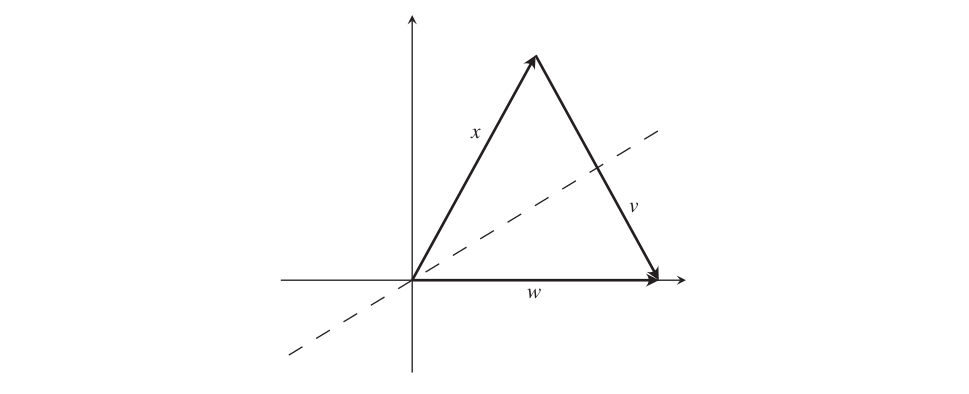

##### lemma 03


assume $x,w$ are vectors of the same euclidean length, $||x||_2 = ||w||_2$. then $w-x$ and $w+x$ are perpendicular.
</br>


##### usw


define vector $v = w-x$ and consider the projection matrix
</br></br>

$$P = \frac{vv^T}{v^Tv}.$$
</br></br>

a <b>projection matrix</b> is a matrix that satisﬁes $P^2 = P$.
</br></br>

geometrically, for any vector $u$, $Pu$ is the projection of $u$ onto $v$. subtract twice the projection $Px$ from $x$ to get $w$. to verify this, set $H = I-2P$. then
</br></br>

\begin{align}
  Hx &= x - 2Px \\
  &= w - v - \frac{2vv^Tx}{v^Tv} \\
  &= w - v - \frac{vv^Tx}{v^Tv} - \frac{vv^T(w-v)}{v^Tv} \\
  &= w - \frac{2vv^T(w+x)}{v^Tv} \\
  \\
  &\Downarrow \quad\text{by lemma 03} \\
  \\
  &= w \quad\checkmark.
\end{align}
</br>

$H$ is called a <b>householder reflector</b>.
</br>


##### <b><font color=grey>theorem 04</font> householder reflectors</b>


let $x,w$ be vectors with $||x||_2 = ||w||_2$ and define $v=w-x$. then $H = I - 2vv^T/v^Tv$ is symmmetric orthogonal matrix and $Hx=w$.
</br>


##### example 17


let $x = [3,4], w = [5,0]$. find householder reflector $h$ that satisfies $Hx = w$.
</br>


\begin{align}
  v &= w-x =
  \begin{bmatrix} 5 \\ 0 \end{bmatrix} -
  \begin{bmatrix} 3 \\ 4 \end{bmatrix} =
  \begin{bmatrix} 2 \\ -4 \end{bmatrix} \\
  \\
  &\Downarrow \\
  \\
  P &= \frac{vv^T}{v^Tv} = \frac{1}{20}
  \begin{bmatrix} 4 & -8 \\ -8 & 16 \end{bmatrix} =
  \begin{bmatrix} 0.2 & -0.4 \\ -0.4 & 0.8 \end{bmatrix} \\
  \\
  &\Downarrow \\
  \\
  H = I - 2P &= \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} -
  \begin{bmatrix} 0.4 & -0.8 \\ -0.8 & 1.6 \end{bmatrix} =
  \begin{bmatrix} 0.6 & 0.8 \\ 0.8 & -0.6 \end{bmatrix} \\
  \\
  &\Downarrow \quad\text{verify} \\
  \\
  Hx &= \begin{bmatrix} 0.6 & 0.8 \\ 0.8 & -0.6 \end{bmatrix}
  \begin{bmatrix} 3 \\ 4 \end{bmatrix} =
  \begin{bmatrix} 5 \\ 0 \end{bmatrix} = w \\
  \\
  Hw &= \begin{bmatrix} 0.6 & 0.8 \\ 0.8 & -0.6 \end{bmatrix}
  \begin{bmatrix} 5 \\ 0 \end{bmatrix} =
  \begin{bmatrix} 3 \\ 4 \end{bmatrix} = x \quad\checkmark
\end{align}
</br>


##### usw


what was the point of gram-schmidt? to get QR. what is the point of householder? to get QR. specifically, reﬂectors will move a column vector $x$ to a coordinate axis as a way of putting zeros into a matrix -- ie, the $R$ of QR.
</br></br>

for $A$ decomposed into $QR$, let $x$ be its first column. let $w = \pm(||A_1||_2,0,\dots,0)$ be a vector along the first coordinate axis of identical euclidean length. (either sign works in theory but choose sign opposite to first component for numerical stability.) create householder reflector $H_1$ such that $H_1x = w$. eg, for $A_{4\times 3}$,
</br></br>

$$
H_1A = H_1
\begin{bmatrix}
  x & x & x \\
  x & x & x \\
  x & x & x \\
  x & x & x
\end{bmatrix}
=
\begin{bmatrix}
  x & x & x \\
  0 & x & x \\
  0 & x & x \\
  0 & x & x
\end{bmatrix}.
$$
</br>

so $H_1$ enabled some RHS zeros. so maybe do that some more.
</br></br>

\begin{align}
  \begin{pmatrix}
    1 & | & 0 & 0 & 0 \\
    - & - & - & - & - \\
    0 & | \\
    0 & | && \hat{H}_2 \\
    0 & |
  \end{pmatrix}
  \begin{pmatrix}
    x & | & x & x \\
    - & - & - & - \\
    0 & | & x & x \\
    0 & | & x & x \\
    0 & | & x & x
  \end{pmatrix}
  &=
  \begin{pmatrix}
    x & | & x & x \\
    - & - & - & - \\
    0 & | & x & x \\
    0 & | & 0 & x \\
    0 & | & 0 & x
  \end{pmatrix} \\
  \\
  &\Downarrow \\
  \\
  \begin{pmatrix}
    1 & 0 & | & 0 & 0 \\
    0 & 1 & | & 0 & 0 \\
    - & - & - & - & - \\
    0 & 0 & | \\
    0 & 0 & | && \hat{H}_3
  \end{pmatrix}
  \begin{pmatrix}
    x & x & | & x \\
    0 & x & | & x \\
    - & - & - & - \\
    0 & 0 & | & x \\
    0 & 0 & | & x
  \end{pmatrix}
  &=
  \begin{pmatrix}
    x & x & | & x \\
    0 & x & | & x \\
    - & - & - & - \\
    0 & 0 & | & x \\
    0 & 0 & | & 0
  \end{pmatrix} \\
  \\
  &\Downarrow \\
  \\
  H_3H_2H_1A &= R \\
  \\
  A = H_1H_2H_3R &= QR.
\end{align}
</br>

note $H_i^T = H_i$ bc $H_i$ is symmetric orthogonal.
</br>


##### example 18


use householder reflectors to find QR factorization of
</br></br>

$$A = \begin{bmatrix} 3 & 1 \\ 4 & 3 \end{bmatrix}.$$
</br>


find householder reflector that moves first column $[3,4]$ onto $x$-axis. from example 17,
</br></br>

\begin{align}
  H_1A &=
  \begin{bmatrix} 0.6 & 0.8 \\ 0.8 & -0.6 \end{bmatrix}
  \begin{bmatrix} 3 & 1 \\ 4 & 3 \end{bmatrix}
  =
  \begin{bmatrix} 5 & 3 \\ 0 & -1 \end{bmatrix} \\
  \\
  &\Downarrow \quad\text{multiply both sides on left by }H_1^{-1} = H_1 \\
  \\
  A &=
  \begin{bmatrix} 3 & 1 \\ 4 & 3 \end{bmatrix}
  =
  \begin{bmatrix} 0.6 & 0.8 \\ 0.8 & -0.6 \end{bmatrix}
  \begin{bmatrix} 5 & 3 \\ 0 & -1 \end{bmatrix}
  = QR \quad\text{ where } Q = H_1^T = H_1.
\end{align}
</br>


##### example 19


continues example 17.
</br></br>

use householder reflectors to find QR factorization of
</br></br>

$$A = \begin{bmatrix} 1 & -4 \\ 2 & 3 \\ 2 & 2 \end{bmatrix}.$$
</br>


find householder reflector that moves first column $[1,2,2]$ to vector $w = [||x||_2,0,0]$. set $v = w-x = [3,0,0] - [1,2,2] = [2,-2,-2]$.
</br></br>

\begin{align}
  H_1 &=
  \begin{bmatrix}
    1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1
  \end{bmatrix} - \frac{2}{12}
  \begin{bmatrix}
    4 & -4 & -4 \\ -4 & 4 & 4 \\ -4 & 4 & 4
  \end{bmatrix} =
  \begin{bmatrix}
    \frac{1}{3} & \frac{2}{3} & \frac{2}{3} \\
    \frac{2}{3} & \frac{1}{3} & -\frac{2}{3} \\
    \frac{2}{3} & -\frac{2}{3} & \frac{1}{3}
  \end{bmatrix} \quad\text{by theorem 04} \\
  \\
  H_1A &=
  \begin{bmatrix}
    \frac{1}{3} & \frac{2}{3} & \frac{2}{3} \\
    \frac{2}{3} & \frac{1}{3} & -\frac{2}{3} \\
    \frac{2}{3} & -\frac{2}{3} & \frac{1}{3}
  \end{bmatrix}
  \begin{bmatrix} 1 & -4 \\ 2 & 3 \\ 2 & 2 \end{bmatrix}
  =
  \begin{bmatrix} 3 & 2 \\ 0 & -3 \\ 0 & -4 \end{bmatrix} \\
  \\
  &\Downarrow \quad\text{move }\hat{x}=[-3,-4]\rightarrow \hat{w}[5,0]\text{ with }H_2\text{ from examples 17,18} \\
  \\
  H_2 \hat{x} &=
  \begin{bmatrix} 0.6 & 0.8 \\ 0.8 & -0.6 \end{bmatrix}
  \begin{bmatrix} -3 \\ -4 \end{bmatrix}
  =
  \begin{bmatrix} 5 \\ 0 \end{bmatrix} = \hat{w} \\
  \\
  &\Downarrow \\
  \\
  H_2H_1A &=
  \begin{bmatrix}
    1 & 0 & 0 \\ 0 & 0.6 & 0.8 \\ 0 & 0.8 & -0.6
  \end{bmatrix}
  \begin{bmatrix}
    \frac{1}{3} & \frac{2}{3} & \frac{2}{3} \\
    \frac{2}{3} & \frac{1}{3} & -\frac{2}{3} \\
    \frac{2}{3} & -\frac{2}{3} & \frac{1}{3}
  \end{bmatrix}
  \begin{bmatrix} 1 & -4 \\ 2 & 3 \\ 2 & 2 \end{bmatrix}
  =
  \begin{bmatrix} 3 & 2 \\ 0 & 5 \\ 0 & 0 \end{bmatrix} = R \\
  \\
  &\Downarrow \quad\text{multiply both sides on left by }H_1^{-1}H_2^{-1} = H_1H_2 \\
  \\
  \begin{bmatrix} 1 & -4 \\ 2 & 3 \\ 2 & 2 \end{bmatrix}
  &= H_1H_2R =
  \begin{bmatrix}
    \frac{1}{3} & \frac{2}{3} & \frac{2}{3} \\
    \frac{2}{3} & \frac{1}{3} & -\frac{2}{3} \\
    \frac{2}{3} & -\frac{2}{3} & \frac{1}{3}
  \end{bmatrix}
  \begin{bmatrix}
    1 & 0 & 0 \\ 0 & 0.6 & 0.8 \\ 0 & 0.8 & -0.6
  \end{bmatrix}
  \begin{bmatrix} 3 & 2 \\ 0 & 5 \\ 0 & 0 \end{bmatrix} \\
  \\
  &=
  \begin{bmatrix}
    \frac{1}{3} & -\frac{14}{15} & -\frac{2}{15} \\
    \frac{2}{3} & \frac{1}{3} & -\frac{2}{3} \\
    \frac{2}{3} & \frac{2}{15} & \frac{11}{15}
  \end{bmatrix}
  \begin{bmatrix} 3 & 2 \\ 0 & 5 \\ 0 & 0 \end{bmatrix} = QR.
\end{align}
</br>


householder reflection costs $\frac{2}{3}m^3$ multiplications and the same number of additions -- lower than gram-schmidt orthogonalization. householder also delivers better orthogonality and requires less memory. however, for large matrices, householder reflection is complicated in costly ways - which is why numpy and scipy use modified gram-schmidt.
</br>


###### code


In [ ]:
# 240308 ksa  lol = not yet, check next semester. but theres a decent python
#             link miscellaney for young students who dont like to relax.


### miscellaney


* gram-schmidt [@khan](https://www.youtube.com/watch?v=rHonltF77zI) (19m)
* QR decomposition [@brightside](https://www.youtube.com/watch?v=FAnNBw7d0vg) (14m)
* same thing [@leahhoward](https://www.youtube.com/watch?v=qmRC8mTPGI8) (8:30m)
* householder QR factorization [@santa](https://www.youtube.com/watch?v=5MeeuSoFBdY) (5m) [@kutz](https://www.youtube.com/watch?v=gvnFVCWI044) (46:30m)
* householder, python [@quantstart](https://www.quantstart.com/articles/QR-Decomposition-with-Python-and-NumPy/)

</br>

<b>libraries</b>
* qr-factorization [@numpy](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html)
</br></br>

<b>some quirks</b>

* [why so negative?](https://scipy-user.scipy.narkive.com/FkwGgR1O/qr-decompostion-gives-negative-q-r)
</br>
